In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:


train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')

# Add 'Survived' column to test dataset from gender_submission
test['Survived'] = gender_submission['Survived']

# Add a 'Dataset' column to differentiate between train and test data
train['Dataset'] = 'Train'
test['Dataset'] = 'Test'

# Concatenate train and test datasets
combined_data = pd.concat([train, test], ignore_index=True)

# Ensure only relevant columns are retained
columns_to_keep = [
    "PassengerId", "Survived", "Pclass", "Name", "Sex", "Age",
    "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked", "Dataset"
]
cleaned_data = combined_data[columns_to_keep]

# Display cleaned data
cleaned_data.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Dataset
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Train
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Train
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Train
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Train
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Train


In [21]:
# Filling missing values (for example, using median for Age)
cleaned_data['Age'].fillna(cleaned_data['Age'].median(), inplace=True)

# You can drop rows with missing values in any column if needed
# cleaned_data.dropna(inplace=True)

# Alternatively, filling missing values in other columns
cleaned_data['Embarked'].fillna('S', inplace=True)  # Example: filling missing 'Embarked' with 'S'

# Display the final cleaned dataset
cleaned_data.head()



C:\Users\rutuj\AppData\Local\Temp\ipykernel_6364\2328859113.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_data['Age'].fillna(cleaned_data['Age'].median(), inplace=True)
C:\Users\rutuj\AppData\Local\Temp\ipykernel_6364\2328859113.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Dataset
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Train
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Train
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Train
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Train
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Train


In [22]:
cleaned_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Dataset
0,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,False,False,False,False,False,False,False,False,False,False,True,False,False
1305,False,False,False,False,False,False,False,False,False,False,False,False,False
1306,False,False,False,False,False,False,False,False,False,False,True,False,False
1307,False,False,False,False,False,False,False,False,False,False,True,False,False


<Axes: >

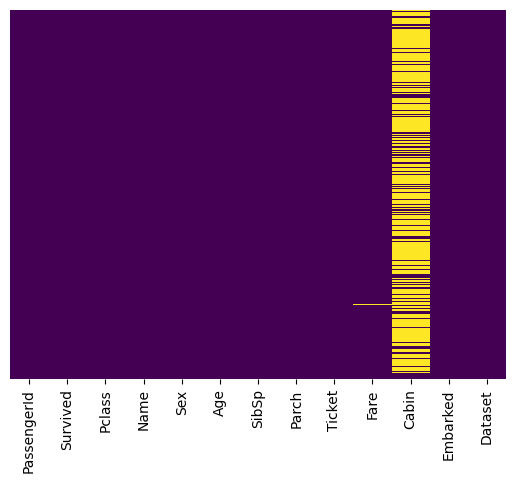

In [23]:
sns.heatmap(cleaned_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: xlabel='Survived', ylabel='count'>

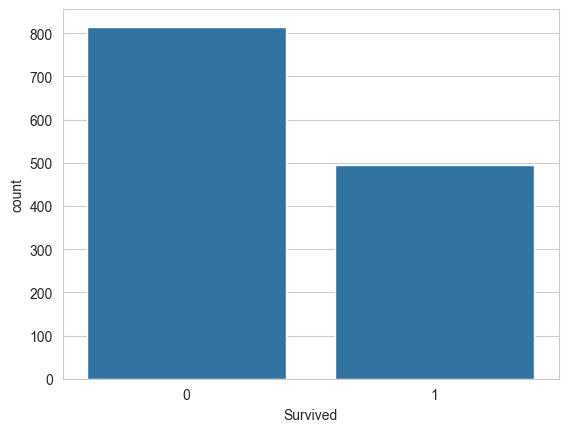

In [24]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=cleaned_data)

<Axes: xlabel='Survived', ylabel='count'>

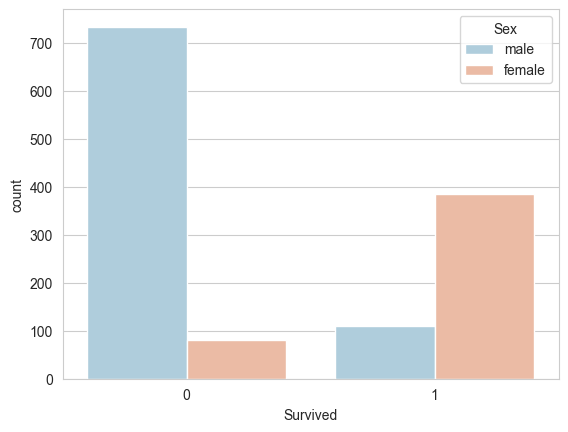

In [25]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=cleaned_data,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

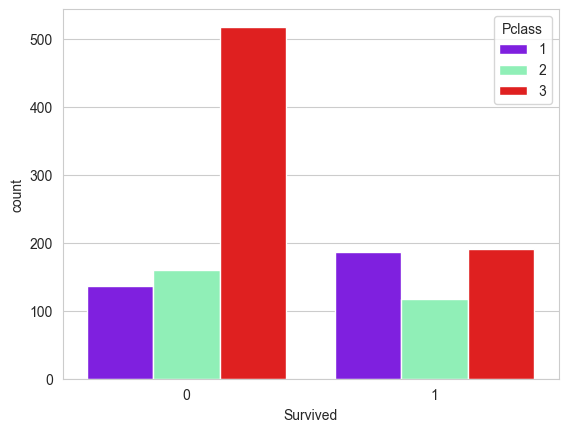

In [26]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=cleaned_data,palette='rainbow')

C:\Users\rutuj\AppData\Local\Temp\ipykernel_6364\3864267187.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cleaned_data['Age'].dropna(),kde=False,color='darkred',bins=40)


<Axes: xlabel='Age'>

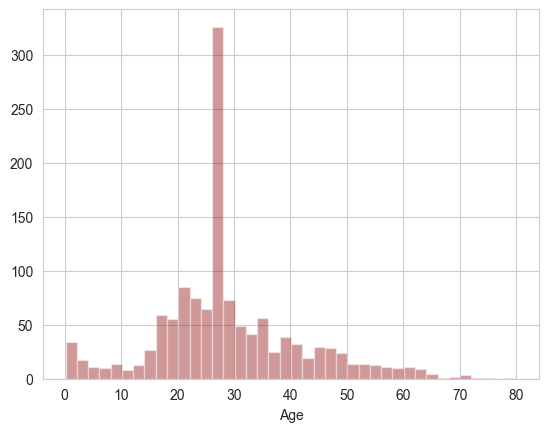

In [27]:
sns.distplot(cleaned_data['Age'].dropna(),kde=False,color='darkred',bins=40)

<Axes: >

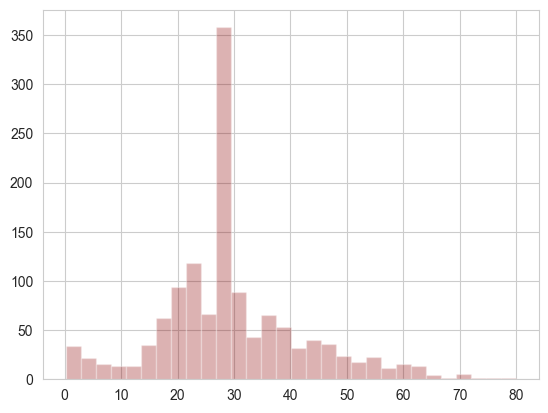

In [28]:
cleaned_data['Age'].hist(bins=30,color='darkred',alpha=0.3)

<Axes: xlabel='SibSp', ylabel='count'>

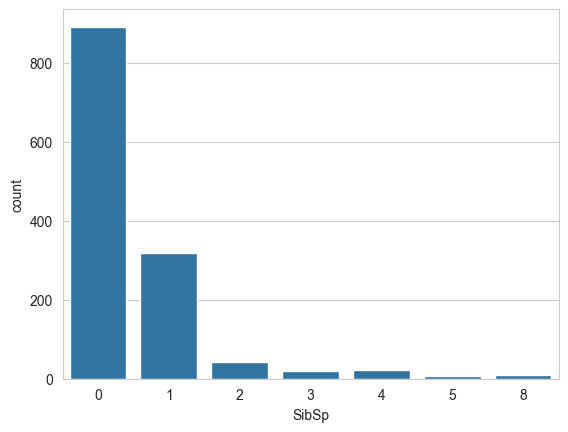

In [29]:
sns.countplot(x='SibSp',data=cleaned_data)

<Axes: >

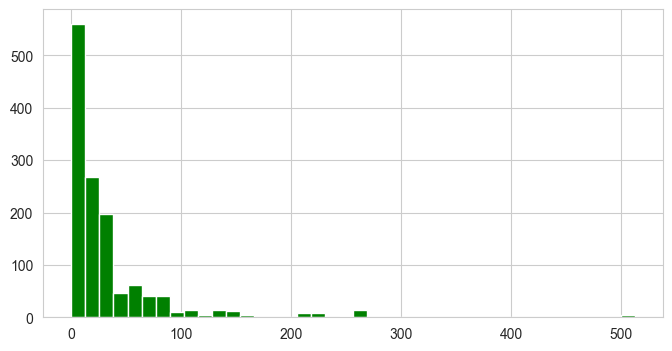

In [30]:
cleaned_data['Fare'].hist(color='green',bins=40,figsize=(8,4))

In [31]:
import cufflinks as cf
cf.go_offline()

In [34]:

cleaned_data['Fare'] = pd.to_numeric(cleaned_data['Fare'], errors='coerce')


C:\Users\rutuj\AppData\Local\Temp\ipykernel_6364\3818761209.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Pclass', ylabel='Age'>

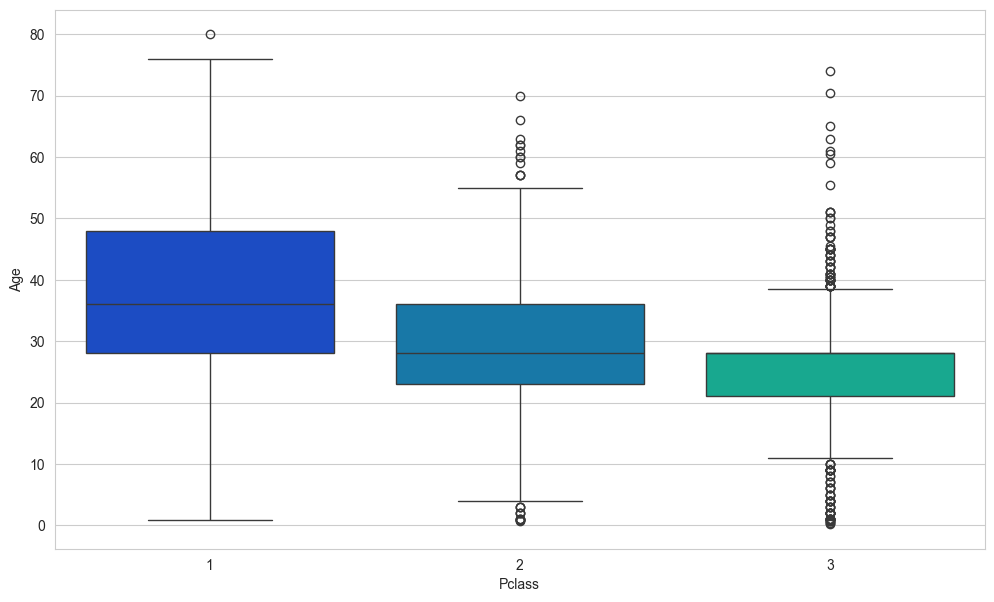

In [35]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=cleaned_data,palette='winter')

In [36]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [37]:
cleaned_data['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

C:\Users\rutuj\AppData\Local\Temp\ipykernel_6364\822839471.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\rutuj\AppData\Local\Temp\ipykernel_6364\822839471.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



<Axes: >

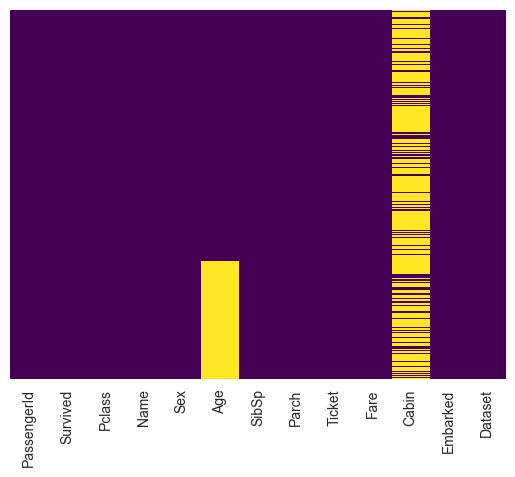

In [38]:
sns.heatmap(cleaned_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [39]:
cleaned_data.drop('Cabin',axis=1,inplace=True)

In [41]:
cleaned_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Dataset
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Train
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Train
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Train
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Train
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Train


In [42]:
cleaned_data.dropna(inplace=True)

In [43]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Dataset      891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [44]:
pd.get_dummies(cleaned_data['Embarked'],drop_first=True).head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [45]:
sex = pd.get_dummies(cleaned_data['Sex'],drop_first=True)
embark = pd.get_dummies(cleaned_data['Embarked'],drop_first=True)

In [46]:
cleaned_data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
cleaned_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Dataset
0,1,0,3,22.0,1,0,7.2500,Train
1,2,1,1,38.0,1,0,71.2833,Train
2,3,1,3,26.0,0,0,7.9250,Train
3,4,1,1,35.0,1,0,53.1000,Train
4,5,0,3,35.0,0,0,8.0500,Train


In [47]:
cleaned_data = pd.concat([train,sex,embark],axis=1)
cleaned_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Dataset,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Train,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Train,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Train,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Train,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Train,True,False,True


In [48]:
cleaned_data.drop('Survived',axis=1).head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Dataset,male,Q,S
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Train,True,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Train,False,False,False
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Train,False,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Train,False,False,True
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Train,True,False,True


In [49]:
cleaned_data.drop('Survived',axis=1).head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Dataset,male,Q,S
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Train,True,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Train,False,False,False
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Train,False,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Train,False,False,True
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Train,True,False,True


In [50]:
cleaned_data['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(cleaned_data.drop('Survived',axis=1), 
                                                    cleaned_data['Survived'], test_size=0.30, 
                                                    random_state=101)

In [54]:
from sklearn.linear_model import LogisticRegression


In [57]:
logmodel = LogisticRegression()

# Print the parameters
print(logmodel.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [60]:
print(X_train.shape)  # Should print (n_samples, n_features)
print(y_train.shape)  # Should print (n_samples,)


(623, 15)
(623,)


In [61]:
print(X_train.isnull().sum())  # Check for missing values in X_train
print(y_train.isnull().sum())  # Check for missing values in y_train


PassengerId      0
Pclass           0
Name             0
Sex              0
Age            119
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          482
Embarked         1
Dataset          0
male             0
Q                0
S                0
dtype: int64
0


In [64]:
from sklearn.preprocessing import LabelEncoder

# Apply LabelEncoder to the target variable if it's categorical
le = LabelEncoder()
y_train = le.fit_transform(y_train)


In [66]:
print(X_train.dtypes)



PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Dataset         object
male              bool
Q                 bool
S                 bool
dtype: object


In [67]:
from sklearn.preprocessing import LabelEncoder

# Example: encoding the 'Sex' column as an example of categorical data
le = LabelEncoder()
X_train['Sex'] = le.fit_transform(X_train['Sex'])

# Similarly, encode other categorical features if necessary


In [69]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Sex', 'Embarked'])  # Add your categorical columns
    ], remainder='passthrough')

X_train = column_transformer.fit_transform(X_train)


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import pandas as pd

# Assuming 'cleaned_data' is your preprocessed dataset
X = cleaned_data.drop('Survived', axis=1)
y = cleaned_data['Survived']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Define categorical and numerical columns
categorical_cols = ['Sex', 'Embarked']
numerical_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),  # Impute missing values with median
            ('scaler', StandardScaler())
        ]), numerical_cols),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing categorical values
            ('onehot', OneHotEncoder(drop='first'))
        ]), categorical_cols)
    ])

# Create a pipeline with preprocessing and logistic regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Train the model on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
predictions = pipeline.predict(X_test)

# Print predictions or evaluate the model as needed
print(predictions)


[0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0
 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0
 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 1 1
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0
 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 1
 0 0 1 0 0 1 0 0 1]


In [81]:
from sklearn.metrics import confusion_matrix

In [82]:
accuracy=confusion_matrix(y_test,predictions)

In [83]:
accuracy

array([[135,  19],
       [ 38,  76]])

In [84]:
from sklearn.metrics import accuracy_score

In [85]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.7873134328358209

In [86]:
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [87]:
from sklearn.metrics import classification_report

In [88]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       154
           1       0.80      0.67      0.73       114

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.78       268



In [89]:
from sklearn.metrics import classification_report

# Assuming you have already made predictions
predictions = pipeline.predict(X_test)

# Generate and print the classification report
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.78      0.88      0.83       154
           1       0.80      0.67      0.73       114

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.78       268



In [90]:
import joblib

# Save the trained pipeline
joblib.dump(pipeline, 'titanic_model.pkl')


['titanic_model.pkl']